<img src="http://oci02.img.iteso.mx/identidad_de_instancia_2018/ITESO/Logos%20ITESO/Logo-ITESO-Principal.jpg">

<center> <font color= #004A94> <font size = 5> Ingeniería Financiera | ITESO </font> <br> <br>

<center> <font color= #004A94> <font size = 6> Microestructura y Sistemas de Trading </font> <br> <br>

<center> <font color=#154360><font size=7> Proyecto <br> <br> Análisis Fundamental </font> <br> <br>

<center> <font color=#004A94><font size=5> Equipo 2 </font> <br> <br>

<center> <font color=#0091EA><font size=4> I.F. Maria Fernanda Ansoleaga | @iteso.mx </font> <br> <br>
<center> <font color=#0091EA><font size=4> I.F. Lidia Natasha Gamez  | if709031@iteso.mx </font> <br> <br>
<center> <font color=#0091EA><font size=4> I.F. Tamara Martinez | if709156@iteso.mx </font> <br> <br>

# Abstract
Este laboratorio tiene como propósito principal...

## Aspectos Financieros
...

## Aspectos estadísticos

Para poder iniciar con el análisis estadístico se debe observar la gráfica de los valores actuales del indicador. Se van a obtener las características de esta serie de tiempo con el propósito de apoyar la estrategia de inversión que se muestra en este proyecto.

In [5]:
import funciones as fn
import visualizaciones as vn
import pandas as pd
import numpy as np

In [7]:
datos = fn.f_leer_archivo(param_archivo='data2.xlsx')

In [9]:
serie = vn.plot_profit_diario(datos=datos)
serie

A partir de ver esta gráfica se puede inferir que es estacionaria, por la forma que presentan los valores actuales a lo largo del tiempo. En seguida se utilizará la metodología de Box-Jenkins. Esta metodología se aplica a los modelos autorregresivos de media móvil ARMA o a los modelos autorregresivos integrados de media móvil (ARIMA) para encontrar el mejor ajuste de una serie temporal de valores, a fin de que los pronósticos sean más acertados. El primer paso es verificar si la serie de tiempo es estacionaria.

Fuente: https://es.wikipedia.org/wiki/Metodolog%C3%ADa_de_Box-Jenkins

## Estacionariedad
La estacionariedad implica que las propiedades de la serie no varían con respecto al tiempo. En otras palabras significa que su variación (la forma en la que cambia) no cambia en función del tiempo.
Si la serie presenta estacionariedad significa que las características estadisticas de esta son las mismas en el futuro como en el pasado. También no se necesitará usar una serie transformada pues se podrá seguir con los datos originales.

Fuente: https://rpubs.com/Arthurus/492144

Se desea resolver la siguiente prueba de hipótesis
> $H_0$: La serie es estacionaria.

> $H_a$: La serie no es estacionaria.

In [10]:
estacionariedad = fn.f_estacionaria(param_data=datos)
estacionariedad

('p-value = ', 0.33491040981288367, 'La hipótesis nula no se rechaza')

Como el p-value es mayor al alpha que se determinó, este fue de .05, lo que significa que tiene un nivel de significancia del 95%. La hipótesis nula se acepta, lo que quiere decir que los datos son estacionarios. Esto se puede ver en la gráfica, como se mencionó anteriormente. Al ser estacionaria se considera que la media y la varianza son constantes y que se podrá usar la serie original para las siguientes pruebas.

En seguida se obtendrán los componentes de autocorrelación y autocorrelación parcial.

##  Autocorrelación y autocorrelación parcial
La autocorrelación y la autocorrelación parcial son medidas de asociación entre valores de series actuales y pasadas e indican cuáles son los valores de series pasadas más útiles para predecir valores futuros. Con estos datos podrá determinar el orden de los procesos en un modelo ARIMA.
+ **Función de autocorrelación (FAC).** En el retardo k, es la autocorrelación entre los valores de las series que se encuentran a k intervalos de distancia.
+ **Función de autocorrelación parcial (FACP).** En el retardo k, es la autocorrelación entre los valores de las series que se encuentran a k intervalos de distancia, teniendo en cuenta los valores de los intervalos intermedios.


Fuente: https://www.ibm.com/support/knowledgecenter/es/SS3RA7_sub/modeler_mainhelp_client_ddita/components/dt/timeseries_acf_pacf.html

La autocorrelación parcial en el retraso k es la correlación que resulta después de eliminar el efecto de cualquier correlación debido a los términos de la serie en los retrasos más cortos.

Las gráficas de autocorrelación resumen gráficamente la relación entre una observación en una serie de tiempo y una observación en un momento anterior. El eje x del gráfico de FAC indica el retardo en el que se calcula la autocorrelación; el eje y indica el valor de la correlación (entre -1 y 1). 

C:\Users\tamar\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1283: RuntimeWarning:

invalid value encountered in sqrt



(<Figure size 864x432 with 3 Axes>,
 <Figure size 864x432 with 3 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1fc6a49c080>)

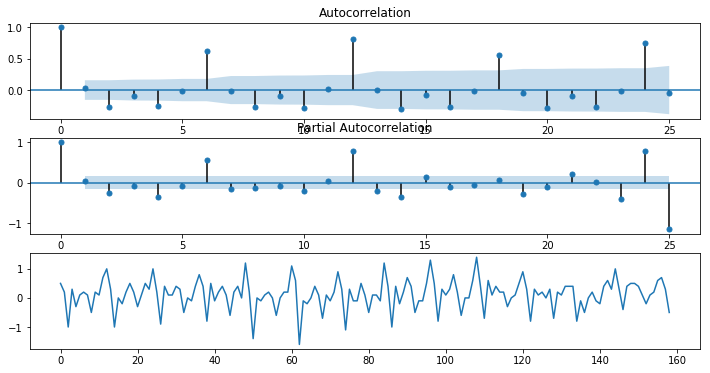

In [14]:
#autocorr = fn.f_autocorrelation(param_data=datos)
pltauto= vn.autocorr(datos)
pltauto

Cuando se acerca más al 1 significa que los datos de la serie de tiempo estan altamente correlacionados, y si sobrepasan el area azul quiere decir que son estadisticamente significantes. En este caso sucede lo contrario, los datos no estan tan correlacionados pues la mayoría de los rezagos son cercanos a cero, esto tambien se ve reflejado en la FACP. Tambíen como sólo pocos sobrepasan el área azul significa que los datos no son estadísticamente significantes, lo que vuelve a afirmar que no estan autocorrelacionados.

## Estacionalidad
La estacionalidad son aquellos componentes de la serie que se repiten sistemáticamente en un periodo de tiempo determinado.

Fuente: http://www.est.uc3m.es/esp/nueva_docencia/comp_col_get/lade/econometria_II/documentacion/Tema1_esther_ruiz_2007.pdf

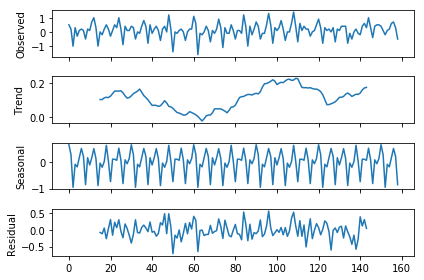

In [15]:
seasonality = vn.f_seasonality(param_data=datos)

A partir de la gráfica de Seasonal se puede observar que la serie cumple con la presentación de varios ciclos en los 153 meses modelados. El ciclo se ve cada 30 aproximadamente. El pico de este ciclo se da un mes antes de que se acabe, es decir en el 29 y el punto más bajo es el mes que le sigue. Esto es de mucha utilidad a la hora de hacer la estrategia de inversión pues nos da un indicio de como se portaría la serie en cada ciclo y así poder tomar decisiones más eficientes.

Hasta aquí se podría dejar el análisis de la serie de tiempo según Box-Jenkins, pero para hacer un análisis más profundo se harán un par de pruebas más para determinar mas características de esta.

## Heterocedasticidad
La heterocedasticidad se presenta en un modelo predictivo cuando la varianza de las perturbaciones de la variable endógena no se mantiene a lo largo de las observaciones, es decir, la varianza de los errores no son constantes. 

Fuente: https://medium.com/high-data/el-concepto-de-heterocedasticidad-36cda43bb8f7

Se desea resolver la siguiente prueba de hipótesis
> $H_0$: La serie es heterocedástica.

> $H_a$: La serie no es heterocedástica.

In [16]:
hetero = fn.f_hetero(param_data=datos)
hetero

[{'LM Statistic': 95.04794239683902,
  'LM-Test p-value': 4.1872317215068734e-14,
  'F-Statistic': 17.66870232961587,
  'F-Test p-value': 9.852988146939338e-24}]

No se acepta la hipotesis nula, que es que los datos no son heterocedasticos. Se verificó una de las propiedades que una serie estacionaria presenta que es que la varianza es constante. También esto significa que se cumple una de las hipótesis básicas y es una propiedad fundamental sobre las que se asienta el modelo de regresión lineal.

## Prueba de normalidad
Primero se definirá qué es que los datos sean normales. Se quiere probar si los datos de la serie de tiempo tienen una distribución normal.


La distribución normal es un modelo teórico capaz de aproximar satisfactoriamente el valor de una variable aleatoria continua a una situación ideal. 


$X\sim N(\mu,\sigma^2)$ Parámetros: Media=$\mu$ y varianza=$\sigma^2$
$$ \textbf{Función de densidad de probabilidad}\\ f(x)= \frac{1}{\sigma\sqrt{2\pi}}e^{\frac{-(x-\mu)^2}{2\sigma^2}}$$
$$ \textbf{Función de distribución de probabilidad}\\ F(x)= \frac{1}{\sigma\sqrt(2\pi)}\int_{-\infty}^{x}e^{\frac{-(v-\mu)^2}{2\sigma^2}}dv$$

### Propiedades de la distribución normal
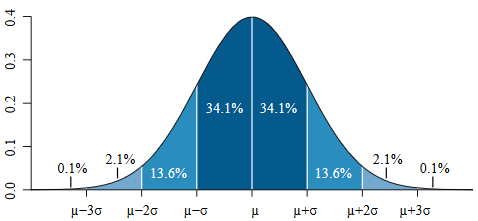
<div style="text-align: center"> Distribución de probabilidad alrededor de la media en una distribución N(μ, σ2). </div>


+ La función normal es simétrica en $\mu$.
+ La moda y la mediana son ambas iguales a la media $\mu$.


Esta curva se conoce como campana de Gauss y es el gráfico de una función gaussiana.

Fuente: https://es.wikipedia.org/wiki/Distribuci%C3%B3n_normal

El uso del modelo normal puede justificarse asumiendo que cada observación se obtiene como la suma de unas pocas causas independientes. Es por esto que se busca ver si los datos de la serie se distribuyen normales.

Se usará primero una prueba gráfica. Se mostrará el histograma de los datos y como se vería si la serie fuera normal representada con una linea roja punteada. Asi mismo, con otra gráfica Q-Q donde se presentan 2 lineas, una roja que representa una distribución normal y los datos representados por puntos azules. Si los datos son normales entonces en la primera gráfica el histograma y la linea punteada serán prácticamente la figura y en la gráfica Q-Q ambas lineas serán iguales.

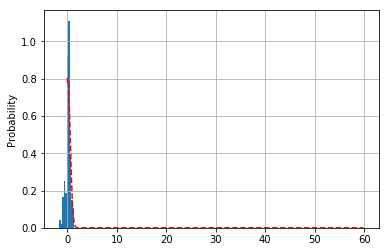

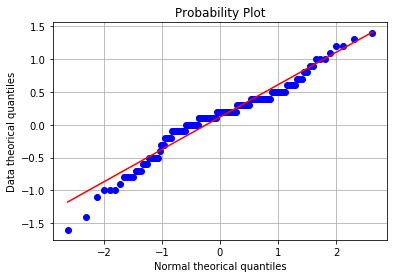

In [17]:
pltnorm = vn.f_normtest(param_data=datos)

En este caso los puntos azules están más dispersos por lo que no se ve gráficamente que la serie distribuye normal. Tampoco el histograma de los datos cabe perfectamente en la linea roja punteada que representa una distribución normla. Como no es suficiente se realizarán pruebas numéricas que comprueben que los datos no tienen una distribución normal.

Se desea resolver la siguiente prueba de hipótesis
> $H_0$: La serie es normal.

> $H_a$: La serie no es normal.

In [19]:
normtest = fn.f_normality_test(param_data=datos)
normtest

('p-value = ', 0.001466542189629913, 'La hipótesis nula se rechaza')

Esta prueba utiliza dos tests de normalidad, el de D'Agostino y Pearson que calcula la asimetría y la curtosis para cuantificar qué tan lejos de Gauss está la distribución en términos de asimetría y forma. Luego calcula en qué medida cada uno de estos valores difiere del valor esperado con una distribución gaussiana, y calcula un solo valor de P a partir de la suma de estas discrepancias. Y la prueba Shapiro-Wilk se utiliza cuando los valores a probar son únicosy no hay vinculos entre ellos.
El p-value tuvo que coincidir en ambas pruebas para que se aceptara que los datos no son normales.

Por último se hará una detección de valores atípicos.

## Detección de atípicos
Un valor atípico es una observación extrañamente grande o pequeña, es una observación que es numéricamente distante del resto de los datos. Los valores atípicos pueden tener un efecto desproporcionado en los resultados estadísticos, como la media. 

Fuente: https://support.minitab.com/es-mx/minitab/18/help-and-how-to/statistics/basic-statistics/supporting-topics/data-concepts/identifying-outliers/

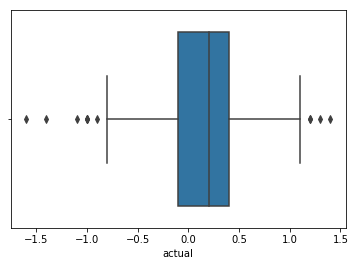

In [20]:
outliers = vn.f_outliers(param_data=datos)
outliers

Los puntos que se ven fuera de la gráfica de boxplot son valores atípicos, ya que no están incluidos en el cuadro de otras observaciones, es decir, no estan cerca de los cuartiles. Estos valores atípicos son observaciones que están a por lo menos 1.5 veces el rango intercuartil (Q3 – Q1) del borde de la caja.

Gracias a todas estas pruebas se puede concluir que la serie de tiempo es estacionaria y no hubo necesidad de diferenciarla. La serie presenta estacionalidad en cíclos de aproximadamente cada 30 meses. Los datos de la serie no están altamente correlacionados y además presenta homocedasticidad, que es que la varianza de las perturbaciones se mantiene constante a lo largo del tiempo. Los datos no  

In [2]:
[df_A, df_B, df_C, df_D] = fn.f_clasificacion_ocurrencia(param_data=datos)

/Users/natasha/Documents/Trading/proyecto_equipo_2/funciones.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  param_data['cons'][i] = param_data['previous'][i]


In [3]:
df_A.shape[0]+df_B.shape[0]+df_C.shape[0]+df_D.shape[0] == datos.shape[0]

True

In [4]:
df_pe = fn.f_precios(param_data=datos)

In [6]:
df_direccion = fn.f_direccion(param_data=df_pe)